# Import Dependencies

In [9]:
import dependencies
import soft_dependencies
import matplotlib.pyplot as plt

In [10]:
from Scripts.generate_data import generate_Ys
from Scripts.scBiGLasso import scBiGLasso
from Scripts.anBiGLasso import anBiGLasso
from Scripts.EiGLasso import EiGLasso

In [11]:
# For timing results
import timeit

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Time scBiGLasso and anBiGLasso
**Note:**

'Easy' data comes from precision matrices generated from an
inverse Wishart distribution with many degrees of freedom.
Empirically, scBiGLasso converges very quickly.

'Hard' data comes from precision amtrices generated from an
inverse Wishart distribution with minimal degrees of freedom.
Empirically, scBiGLasso takes a long time to converge.

In [16]:
attempts = 10
def generate_timing_graph(sizes, attempts, df_scale, verbose=False):
    times_sc = []
    times_an = []
    times_eig = []
    for size in sizes:
        if verbose:
            print(f"Starting {size=}")
        times_sc.append(0)
        times_an.append(0)
        times_eig.append(0)
        _, _, Ys = generate_Ys(
            m=(m:=100),
            n=(n:=size),
            p=(p:=size),
            expected_nonzero_psi=n**2 / 5,
            expected_nonzero_theta=p**2 / 5,
            structure="Kronecker Sum",
            df_scale=df_scale
        )
        def time_scBiGLasso():
            scBiGLasso(
                N = 100,
                eps = 10e-4,
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
                verbose = False
            )
        def time_anBiGLasso():
            anBiGLasso(
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
                B_approx_iters = 10
            )
        def time_EiGLasso():
            EiGLasso(
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01
            )
        timer = timeit.Timer(time_scBiGLasso)
        times_sc[-1] = timer.timeit(attempts) / attempts
        timer = timeit.Timer(time_anBiGLasso)
        times_an[-1] = timer.timeit(attempts) / attempts
        timer = timeit.Timer(time_EiGLasso)
        times_eig[-1] = timer.timeit(attempts) / attempts
        if verbose:
            print(
                f"\tSc: {times_sc[-1]} Seconds"
                + f"\n\tAn: {times_an[-1]} Seconds"
                + f"\n\tEig: {times_eig[-1]} Seconds"
            )
    return times_sc, times_an, times_eig
print("Times on an 'easy' distribution")
sizes_for_easy = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sc_easy, an_easy, eig_easy = generate_timing_graph(
    sizes_for_easy,
    attempts,
    df_scale=10,
    verbose=True
)
print("Times on a 'hard' distribution")
sizes_for_hard = [10, 20, 30, 40, 50]
sc_hard, an_hard, eig_hard = generate_timing_graph(
    sizes_for_hard,
    attempts,
    df_scale=1,
    verbose=True
)

Times on an 'easy' distribution
Starting size=10
	Sc: 0.01824049999995623 Seconds
	An: 0.003960208300850354 Seconds
	Eig: 0.0024196667000069283 Seconds
Starting size=20
	Sc: 0.03553122919984162 Seconds
	An: 0.009356645900697912 Seconds
	Eig: 0.002783975000784267 Seconds
Starting size=30
	Sc: 0.07180657499993685 Seconds
	An: 0.017708841600688176 Seconds
	Eig: 0.0053264916990883645 Seconds
Starting size=40
	Sc: 0.10442707920010434 Seconds
	An: 0.032585537500563075 Seconds
	Eig: 0.010092858399730176 Seconds
Starting size=50
	Sc: 0.13989798330003395 Seconds
	An: 0.04598981250019278 Seconds
	Eig: 0.018402495799819008 Seconds
Starting size=60
	Sc: 0.17758928750117775 Seconds
	An: 0.05931893750093877 Seconds
	Eig: 0.02317830829997547 Seconds
Starting size=70
	Sc: 0.22313960000028601 Seconds
	An: 0.07611423339985776 Seconds
	Eig: 0.03164622080075787 Seconds
Starting size=80
	Sc: 0.27427952500001995 Seconds
	An: 0.09622734579897951 Seconds
	Eig: 0.042308645800221714 Seconds
Starting size=90
	Sc

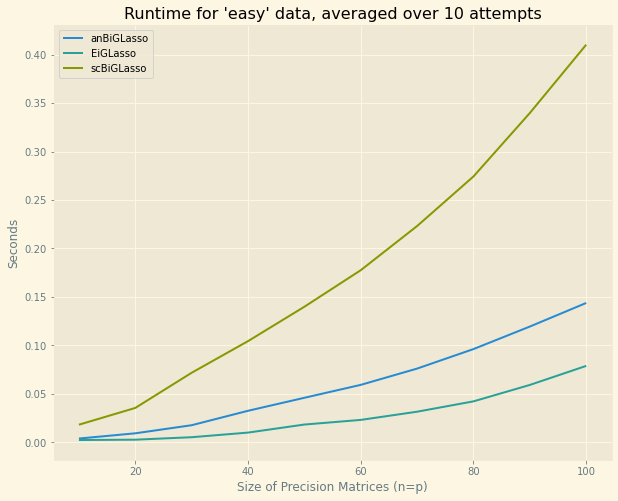

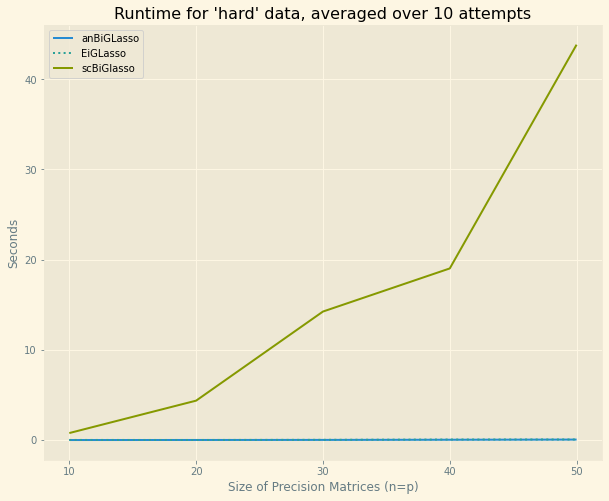

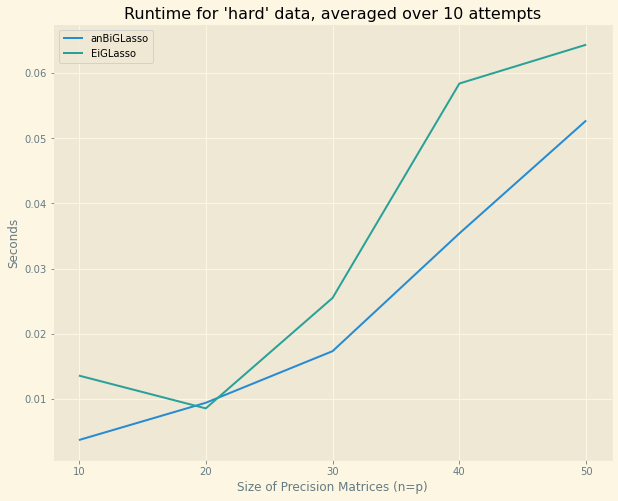

In [22]:
with plt.style.context('Solarize_Light2'):
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        ax1.plot(sizes_for_easy, an_easy, label='anBiGLasso')
        ax1.plot(sizes_for_easy, eig_easy, label='EiGLasso')
        ax1.plot(sizes_for_easy, sc_easy, label='scBiGLasso')
        ax1.set_xlabel("Size of Precision Matrices (n=p)")
        ax1.set_ylabel("Seconds")
        ax1.set_title(f"Runtime for 'easy' data, averaged over {attempts} attempts")
        ax1.legend()
        fig1.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Easy Data')
        fig2, ax2 = plt.subplots(figsize=(10, 8))
        ax2.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax2.plot(sizes_for_hard, eig_hard, label='EiGLasso', linestyle=":")
        ax2.plot(sizes_for_hard, sc_hard, label='scBiGlasso')
        ax2.set_xlabel("Size of Precision Matrices (n=p)")
        ax2.set_ylabel("Seconds")
        ax2.set_xticks([10, 20, 30, 40, 50])
        ax2.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax2.legend()
        fig2.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data')
        fig3, ax3 = plt.subplots(figsize=(10, 8))
        ax3.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax3.plot(sizes_for_hard, eig_hard, label='EiGLasso')
        ax3.set_xlabel("Size of Precision Matrices (n=p)")
        ax3.set_ylabel("Seconds")
        ax3.set_xticks([10, 20, 30, 40, 50])
        ax3.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax3.legend()
        fig3.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data No scBiGLasso')